<a href="https://colab.research.google.com/github/AbidYousuf/Abid-Yousuf/blob/main/catvsdogclassTransferLearningAlso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# **Cat/Dog Classification Using Transfer Learning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import*
from keras.models import*
from keras.optimizers import*
from keras.utils import*

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable=False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
#generators are used to provide large set of data provided by keras
#as it is very diificult to process large set of data at one time
#because of insufficient memory
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150),
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def Normalization(image,label):
  image = tf.cast(image/255.0, tf.float32)
  return image,label

train_ds = train_ds.map(Normalization)
validation_ds = validation_ds.map(Normalization)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history1 = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 91ms/step - loss: 0.2609 - accuracy: 0.8910 - val_loss: 0.2241 - val_accuracy: 0.9054
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1895 - accuracy: 0.9201 - val_loss: 0.2021 - val_accuracy: 0.9152
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1602 - accuracy: 0.9340 - val_loss: 0.2453 - val_accuracy: 0.8956
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1294 - accuracy: 0.9467 - val_loss: 0.2077 - val_accuracy: 0.9168
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1075 - accuracy: 0.9575 - val_loss: 0.2254 - val_accuracy: 0.9160
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0844 - accuracy: 0.9667 - val_loss: 0.2445 - val_accuracy: 0.9130
Epoch 7/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0589 - accuracy: 0.9779 - val_loss: 0.2906 - val_accu

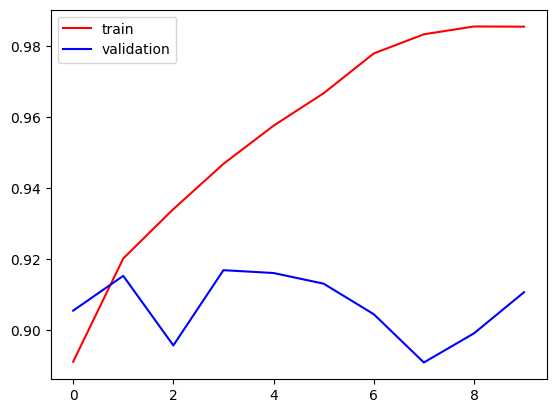

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

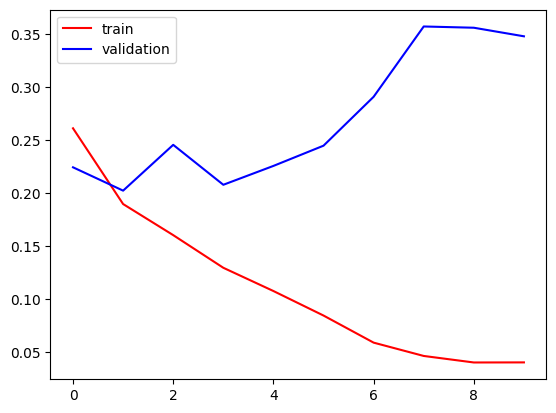

In [ ]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Used Data Augmentation to remove overfitting**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history2 = model.fit_generator( train_generator,epochs=10,validation_data=validation_generator)

<ipython-input-20-f30898936cd0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model.fit_generator( train_generator,epochs=10,validation_data=validation_generator)


Epoch 1/10
625/625 [==============================] - 162s 257ms/step - loss: 0.2042 - accuracy: 0.9187 - val_loss: 0.2208 - val_accuracy: 0.9028
Epoch 2/10
625/625 [==============================] - 161s 257ms/step - loss: 0.1726 - accuracy: 0.9280 - val_loss: 0.2183 - val_accuracy: 0.9140
Epoch 3/10
625/625 [==============================] - 163s 260ms/step - loss: 0.1658 - accuracy: 0.9323 - val_loss: 0.1957 - val_accuracy: 0.9152
Epoch 4/10
625/625 [==============================] - 171s 274ms/step - loss: 0.1516 - accuracy: 0.9363 - val_loss: 0.2137 - val_accuracy: 0.9164
Epoch 5/10
625/625 [==============================] - 163s 261ms/step - loss: 0.1463 - accuracy: 0.9403 - val_loss: 0.2117 - val_accuracy: 0.9134
Epoch 6/10
625/625 [==============================] - 162s 259ms/step - loss: 0.1399 - accuracy: 0.9438 - val_loss: 0.2031 - val_accuracy: 0.9156
Epoch 7/10
625/625 [==============================] - 160s 256ms/step - loss: 0.1276 - accuracy: 0.9481 - val_loss: 0.2127 -

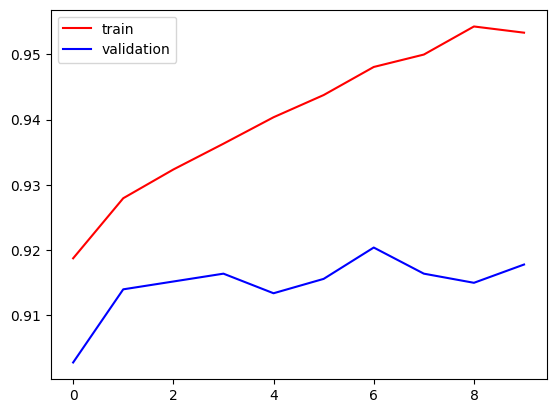

In [ ]:
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

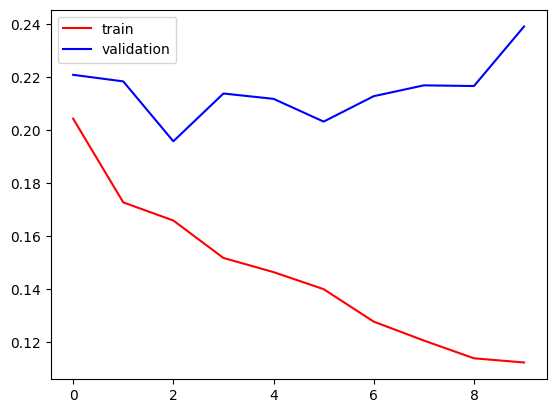

In [ ]:
plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Transfer Learning using Fine Tuning**

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

In [ ]:
import tensorflow

In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#Create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=3,strides=1,activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(64,kernel_size=3,strides=1,activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(128,kernel_size=3,strides=1,activation='relu',padding='valid'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Flatten())

model.add(Dense(120,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(84,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 batch_normalization (Batch  (None, 60, 60, 128)       5

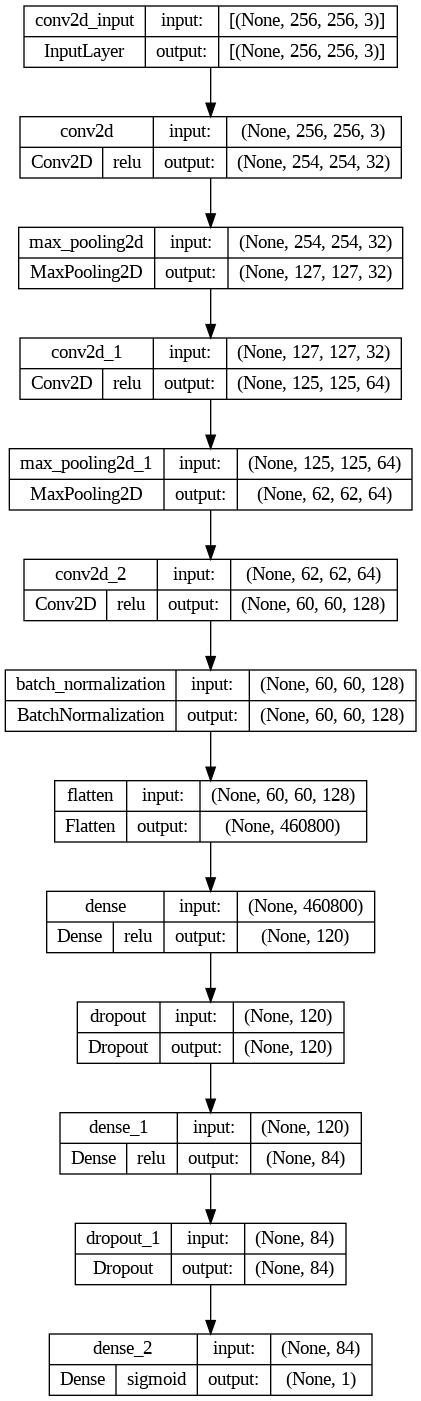

In [ ]:
plot_model(model,to_file='architecture.jpg',show_shapes=True,show_layer_activations=True,show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 98ms/step - loss: 0.7178 - accuracy: 0.5897 - val_loss: 0.7028 - val_accuracy: 0.5566
Epoch 2/10
625/625 [==============================] - 60s 95ms/step - loss: 0.6210 - accuracy: 0.6421 - val_loss: 1.0238 - val_accuracy: 0.5274
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.5850 - accuracy: 0.6908 - val_loss: 0.6872 - val_accuracy: 0.6086
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.5673 - accuracy: 0.7075 - val_loss: 0.7153 - val_accuracy: 0.6718
Epoch 5/10
625/625 [==============================] - 62s 99ms/step - loss: 0.5089 - accuracy: 0.7445 - val_loss: 0.5348 - val_accuracy: 0.7516
Epoch 6/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4629 - accuracy: 0.7802 - val_loss: 1.2350 - val_accuracy: 0.5326
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.4183 - accuracy: 0.8062 - val_loss: 1.6127 - val_accuracy:

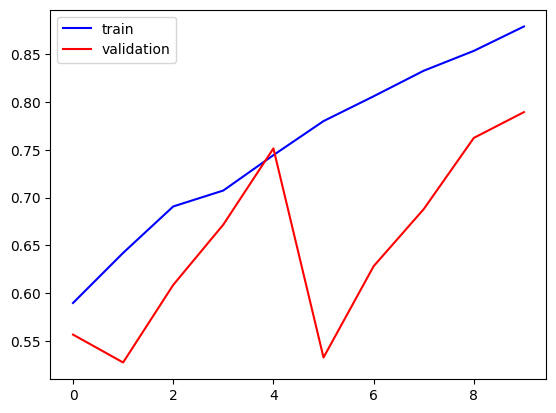

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label ='validation')
plt.legend()
plt.show()


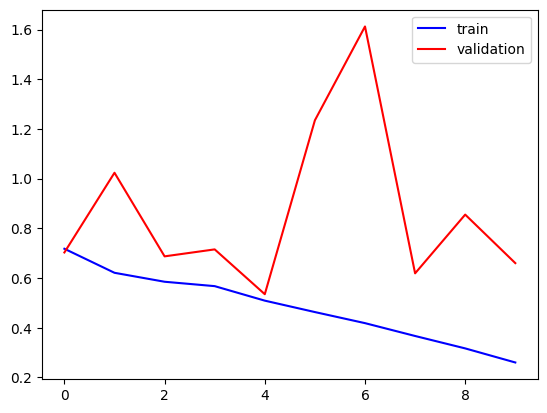

In [ ]:
plt.plot(history.history['loss'], color = 'blue' ,label = 'train')
plt.plot(history.history['val_loss'], color = 'red' ,label = 'validation')
plt.legend()
plt.show()

In [ ]:
import cv2


In [ ]:
test_img.shape

(194, 259, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
print(test_img.shape)
test_input = test_img.reshape(1,256,256,3)


model.predict(test_input)

(256, 256, 3)
1/1 [==============================] - 0s 22ms/step


array([[0.49730593]], dtype=float32)

# **Data Augmentation**

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img = image.load_img('/content/dataaug/dog.jpeg',target_size=(200,200))

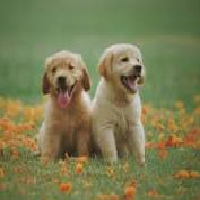

In [ ]:
img

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,             # rescale pixel values to [0, 1]
    rotation_range=20,          # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,      # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,     # randomly shift images vertically (fraction of total height)
    shear_range=0.2,            # shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,             # randomly zooming inside pictures
    horizontal_flip=True,       # randomly flip images horizontally
    fill_mode='nearest'         # strategy used for filling in newly created pixels

)

In [ ]:
img = image.img_to_array(img)

In [ ]:
img.shape

(200, 200, 3)

In [ ]:
input_batch = img.reshape(1,200,200,3)

In [ ]:
i=0
for output in datagen.flow(input_batch,batch_size=1,save_to_dir='newaug'):
  i += 1
  if i==10:
    break



In [ ]:
import random
import os
import numpy as np

In [ ]:
mydir = '/content/dogs_vs_cats/train'

In [ ]:
categories = ['cats','dogs']

In [ ]:
data = []
for i in categories:
  folder_path = os.path.join(mydir,i)
  if i == 'cats':
    label = 0
  else:
    label = 1
  for j in os.listdir(folder_path):
    img_path = os.path.join(folder_path,j)
    img = cv2.imread(img_path)
    img = cv2.resize(img,(150,150))
    data.append([img,label])


In [ ]:
random.shuffle(data)

In [ ]:
X = []
y = []
for i in data:
  X.append(i[0])
  y.append(i[1])


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(20000, 150, 150, 3)